array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

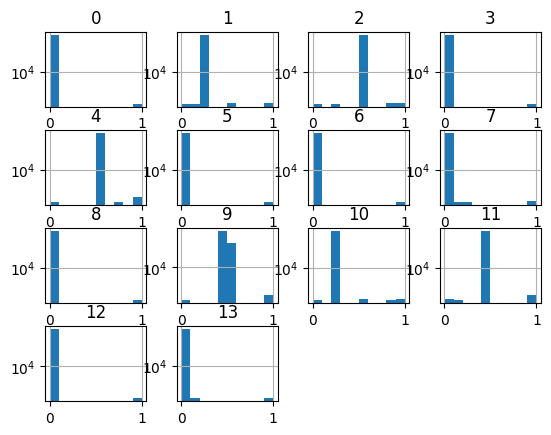

In [2]:
import pandas as pd
import numpy as np
from pyprojroot import here

D7 = np.load(here('data/ori/D7_eeg/D7_eeg_train.npy'))
D7 = D7.reshape(D7.shape[0]*D7.shape[1], 14)
df7 = pd.DataFrame(D7)
df7.hist(log=True)